In [5]:
pip install numpy scikit-learn matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import os

os.environ['LOKY_MAX_CPU_COUNT'] = '4'


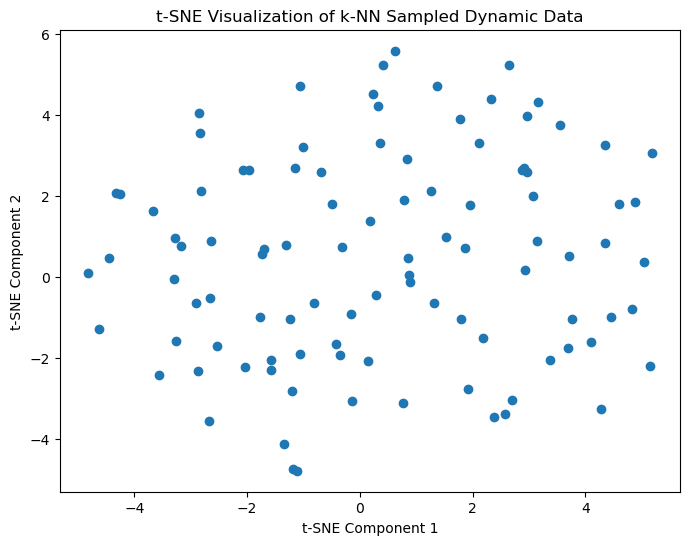

In [7]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Generate random dynamic data (replace this with your actual dynamic data)
dynamic_data = np.random.rand(100, 10)  # 100 samples with 10 features

# Construct k-NN graph
k = 10  # Number of neighbors for k-NN graph
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(dynamic_data)
knn_graph = neigh.kneighbors_graph(dynamic_data).toarray()

# Select sampled points based on k-NN graph
sampled_indices = np.where(np.sum(knn_graph, axis=1) > 0)[0]
sampled_data = dynamic_data[sampled_indices]

# Apply t-SNE for visualization
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(sampled_data)

# Visualize the data using scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.title('t-SNE Visualization of k-NN Sampled Dynamic Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()
